In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("region_hospital_icu_covid_data.csv")
data.head()

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-04-01,CENTRAL,46,34,115,0,0,0,0
1,2020-04-02,CENTRAL,51,46,129,0,0,0,0
2,2020-04-03,CENTRAL,58,52,148,0,0,0,0
3,2020-04-04,CENTRAL,57,49,161,0,0,0,0
4,2020-04-05,CENTRAL,62,49,154,0,0,0,0


* Do some basic data exploration using pandas and include at minimum **one visualization** and the calculation of **two summary statistics**.

In [3]:
data.describe() #for some reason this command gives the summary statistics of hospitalizations without the others

,hospitalizations
count,10200.000000
mean,136.946373
std,153.915371
min,0.000000
25%,26.000000
50%,83.000000
75%,204.000000
max,1239.000000


In [4]:
#We clean the data to remove non numeric entries, NaN, and negative values

for name in data.columns[2:]:
    data[name] = pd.to_numeric(data[name], errors='coerce')

data = data.dropna()

data.head()

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-04-01,CENTRAL,46.0,34.0,115,0.0,0.0,0.0,0.0
1,2020-04-02,CENTRAL,51.0,46.0,129,0.0,0.0,0.0,0.0
2,2020-04-03,CENTRAL,58.0,52.0,148,0.0,0.0,0.0,0.0
3,2020-04-04,CENTRAL,57.0,49.0,161,0.0,0.0,0.0,0.0
4,2020-04-05,CENTRAL,62.0,49.0,154,0.0,0.0,0.0,0.0


In [5]:
print(data.columns)
for name in data.columns[2:]:
    print(data[name].describe()) #I print the summary statistics for each column

Index(['date', 'oh_region', 'icu_current_covid', 'icu_current_covid_vented',
       'hospitalizations', 'icu_crci_total', 'icu_crci_total_vented',
       'icu_former_covid', 'icu_former_covid_vented'],
      dtype='object')
count    9943.000000
mean       22.562707
std        35.598875
min         0.000000
25%         3.000000
50%         9.000000
75%        25.000000
max       278.000000
Name: icu_current_covid, dtype: float64
count    9943.000000
mean       13.237252
std        24.975795
min         0.000000
25%         1.000000
50%         4.000000
75%        12.000000
max       217.000000
Name: icu_current_covid_vented, dtype: float64
count    9943.000000
mean      136.572463
std       154.907478
min         0.000000
25%        26.000000
50%        82.000000
75%       203.000000
max      1239.000000
Name: hospitalizations, dtype: float64
count    9943.000000
mean       25.537162
std        38.506558
min         0.000000
25%         4.000000
50%        11.000000
75%        30.000000

The data contains these columns ['date','oh_region', 'icu_current_covid', 'icu_current_covid_vented',
       'hospitalizations', 'icu_crci_total', 'icu_crci_total_vented',
       'icu_former_covid', 'icu_former_covid_vented']

There are 10200 data points (entries) for each column. The summary table above gives some statistics about all the columns except the date and 'oh_region'. After cleaning data, we have 9943 data points.

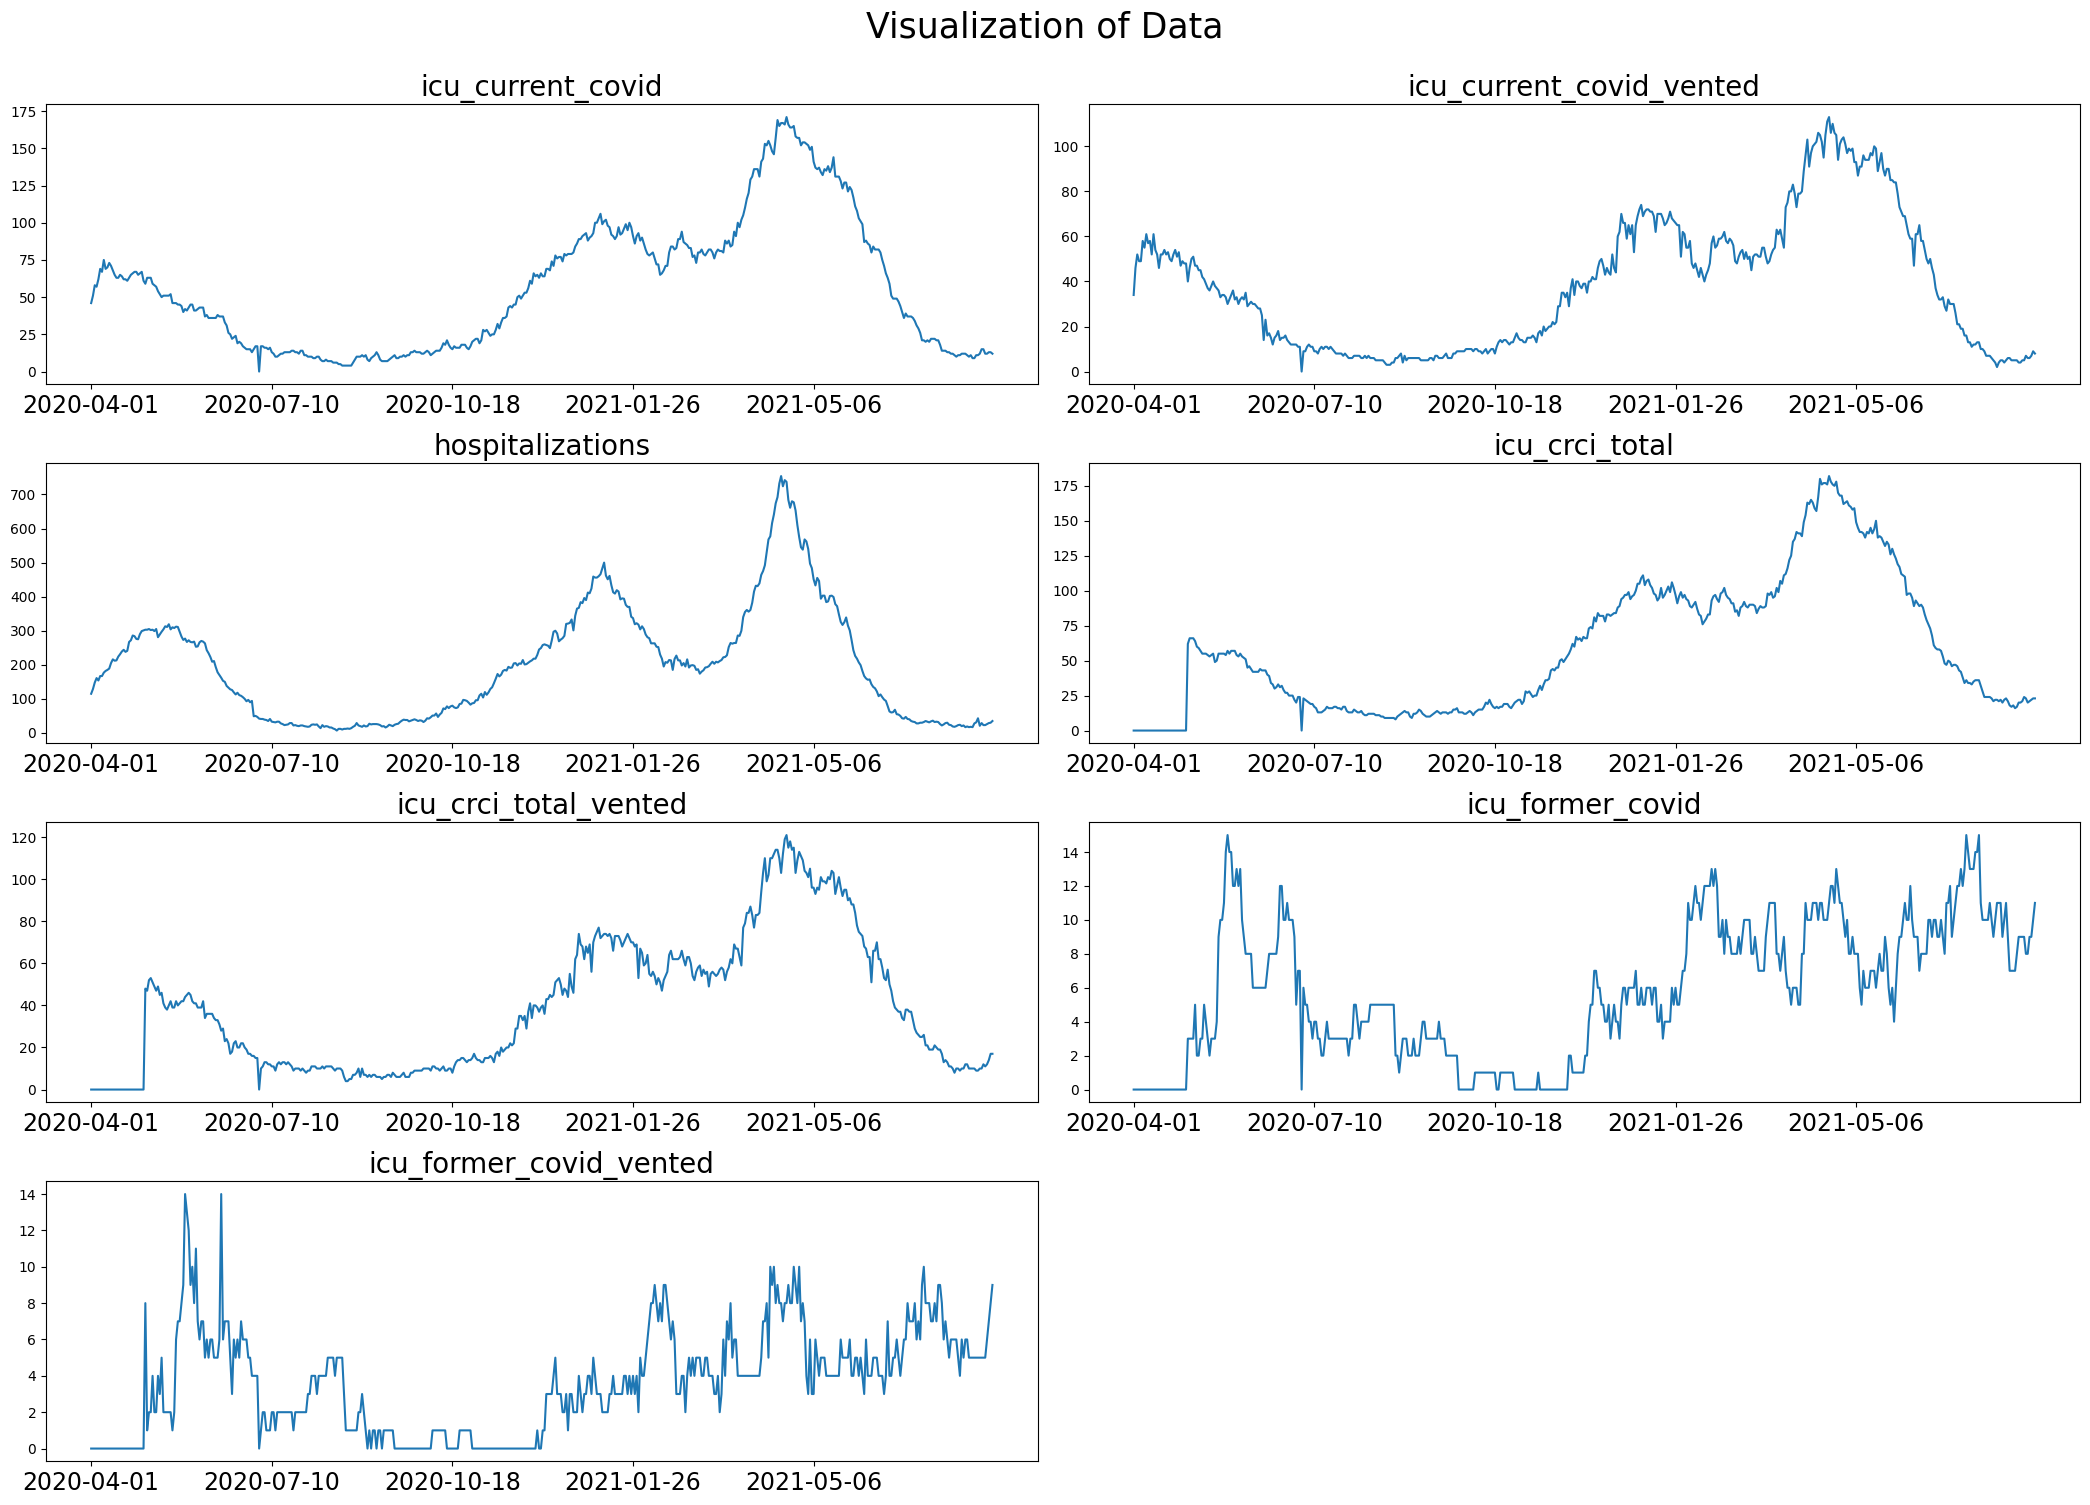

In [6]:
#We visualize the seven columns 
plt.figure(figsize=(21,15))
i = 1
plt.suptitle("Visualization of Data", fontsize = 25, y = 1.0)
for name in data.columns[2:]:
    plt.subplot(4,2,i)
    plt.plot(np.arange(len(data['date'][:500])), data[name][:500])
    plt.xticks(np.arange(0,500,100), data["date"][0:500:100], fontsize = 17)
    plt.title(name, fontsize = 20)
    i +=1
plt.tight_layout()
plt.show()

Since we have a time series data with dates, we visualise time series trajectory of the various reported cases on hospitalisation, icu use, ventilators use. Since we have about 10200 data points, we only visualise the first 500 datapoints. 

In [7]:
regions = data["oh_region"].unique() #Each region has equal number of data points (entries)
regions

array(['CENTRAL', 'EAST', 'NORTH EAST', 'NORTH WEST', 'TORONTO', 'WEST'],
      dtype=object)

We identified that there were six regions, so then we analyse the trends in the individual regions. 

In [8]:
data.set_index("oh_region", inplace= True) #setting the column 'oh_region' as index to easily group the data according to region

data.head()

,date,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
oh_region,,,,,,,,
CENTRAL,2020-04-01,46.0,34.0,115,0.0,0.0,0.0,0.0
CENTRAL,2020-04-02,51.0,46.0,129,0.0,0.0,0.0,0.0
CENTRAL,2020-04-03,58.0,52.0,148,0.0,0.0,0.0,0.0
CENTRAL,2020-04-04,57.0,49.0,161,0.0,0.0,0.0,0.0
CENTRAL,2020-04-05,62.0,49.0,154,0.0,0.0,0.0,0.0


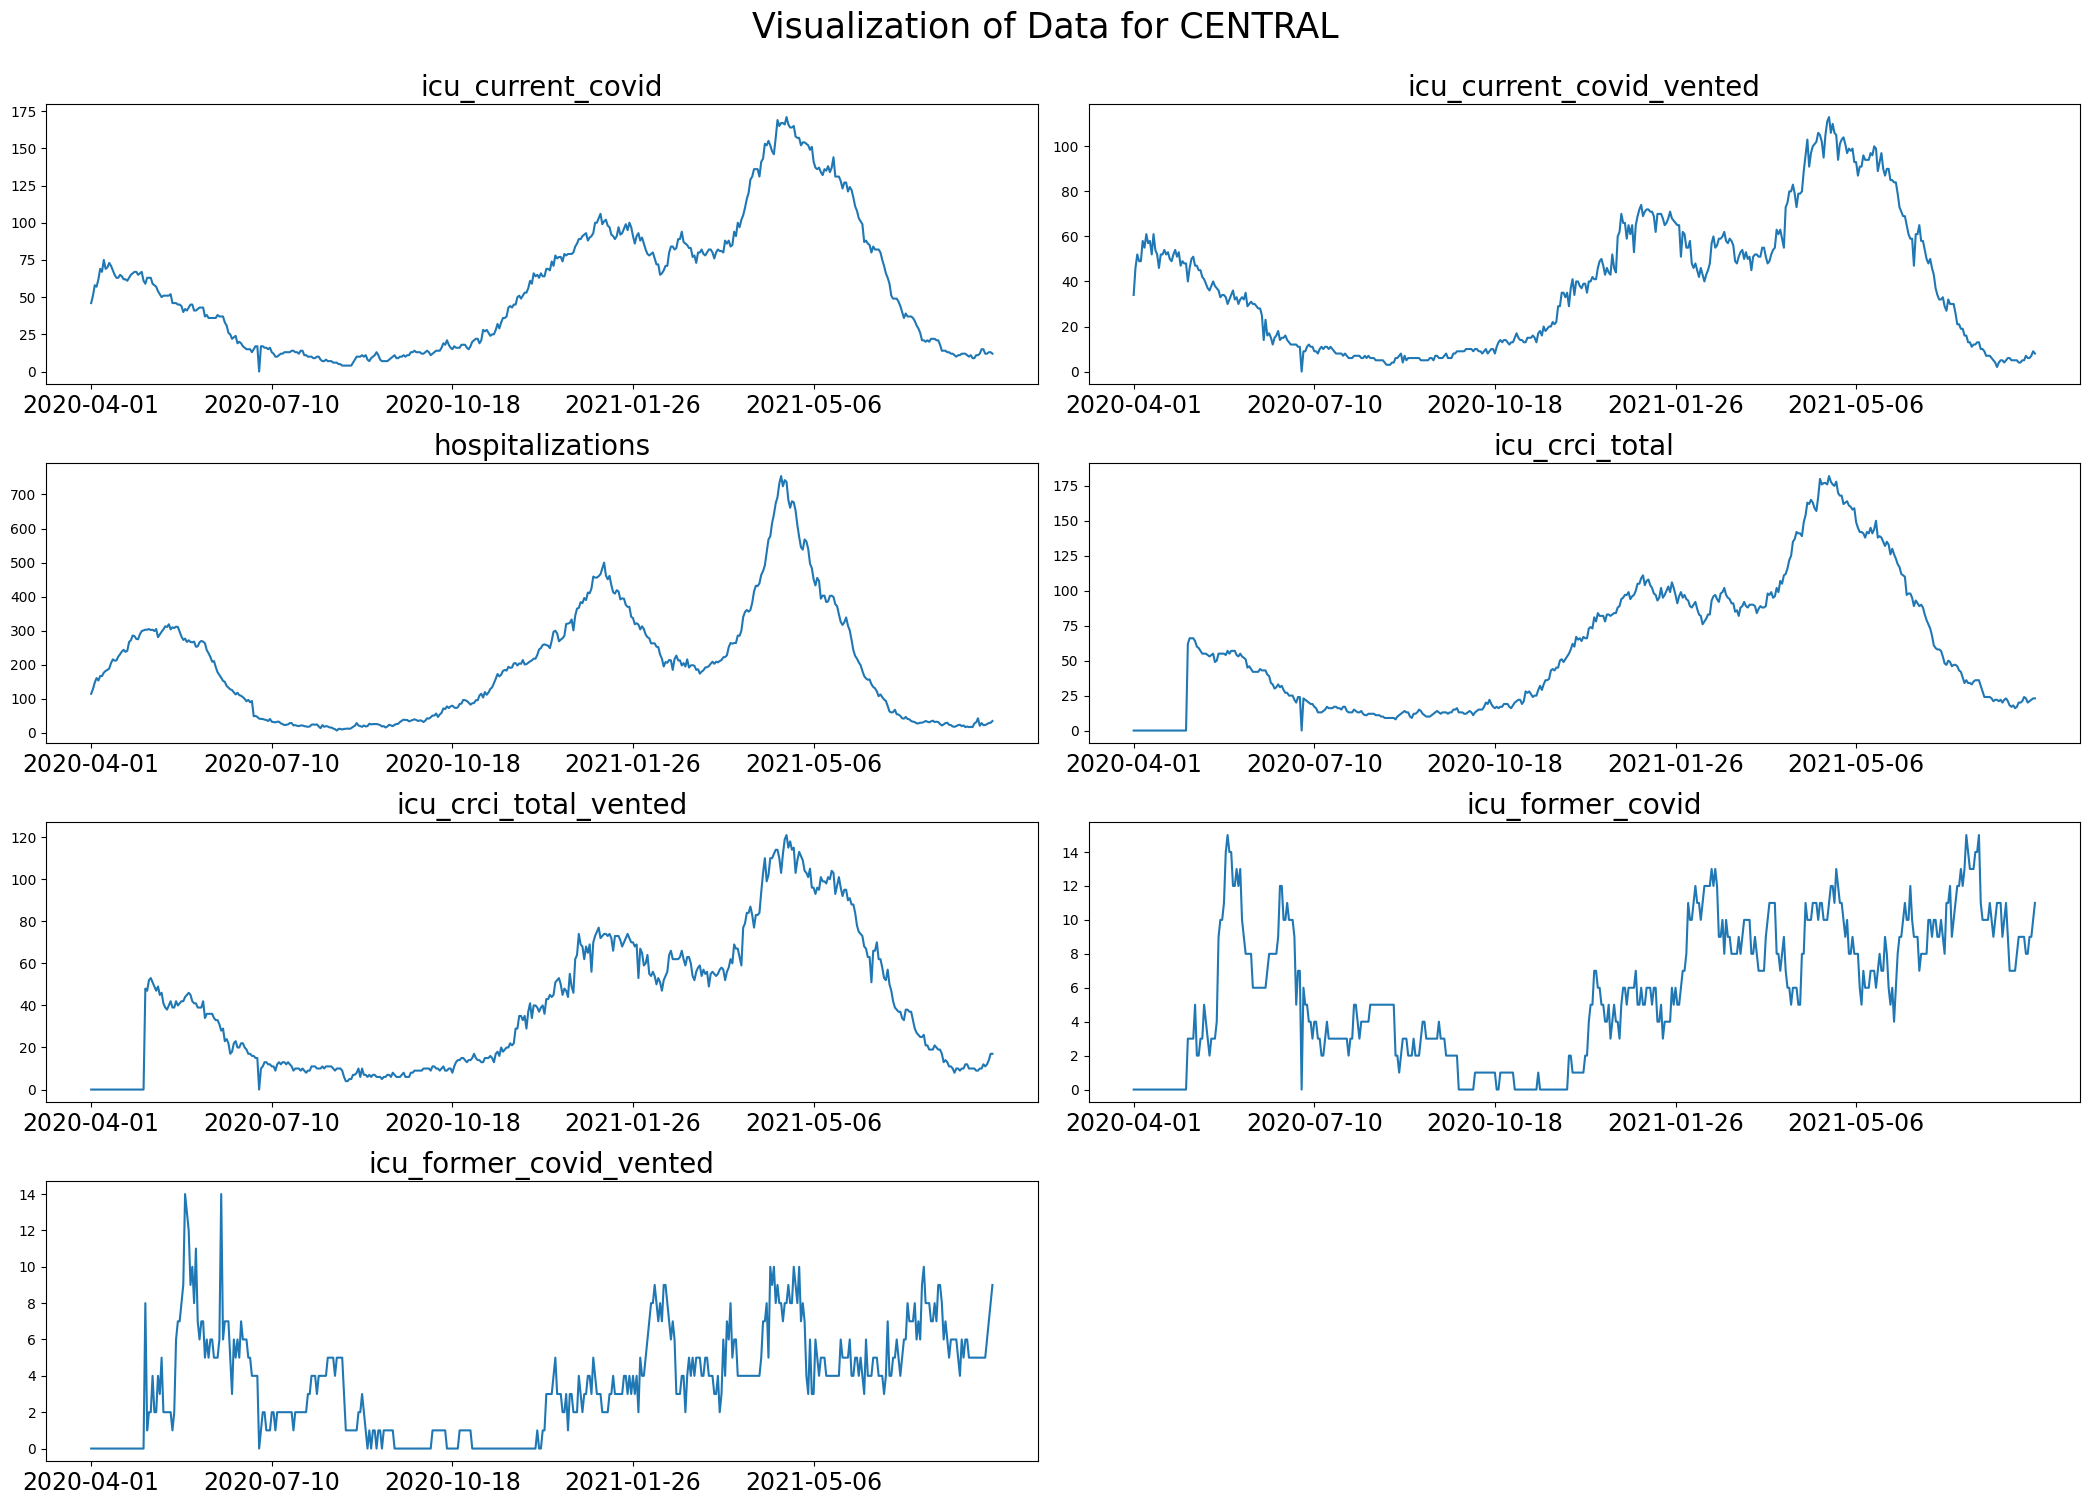

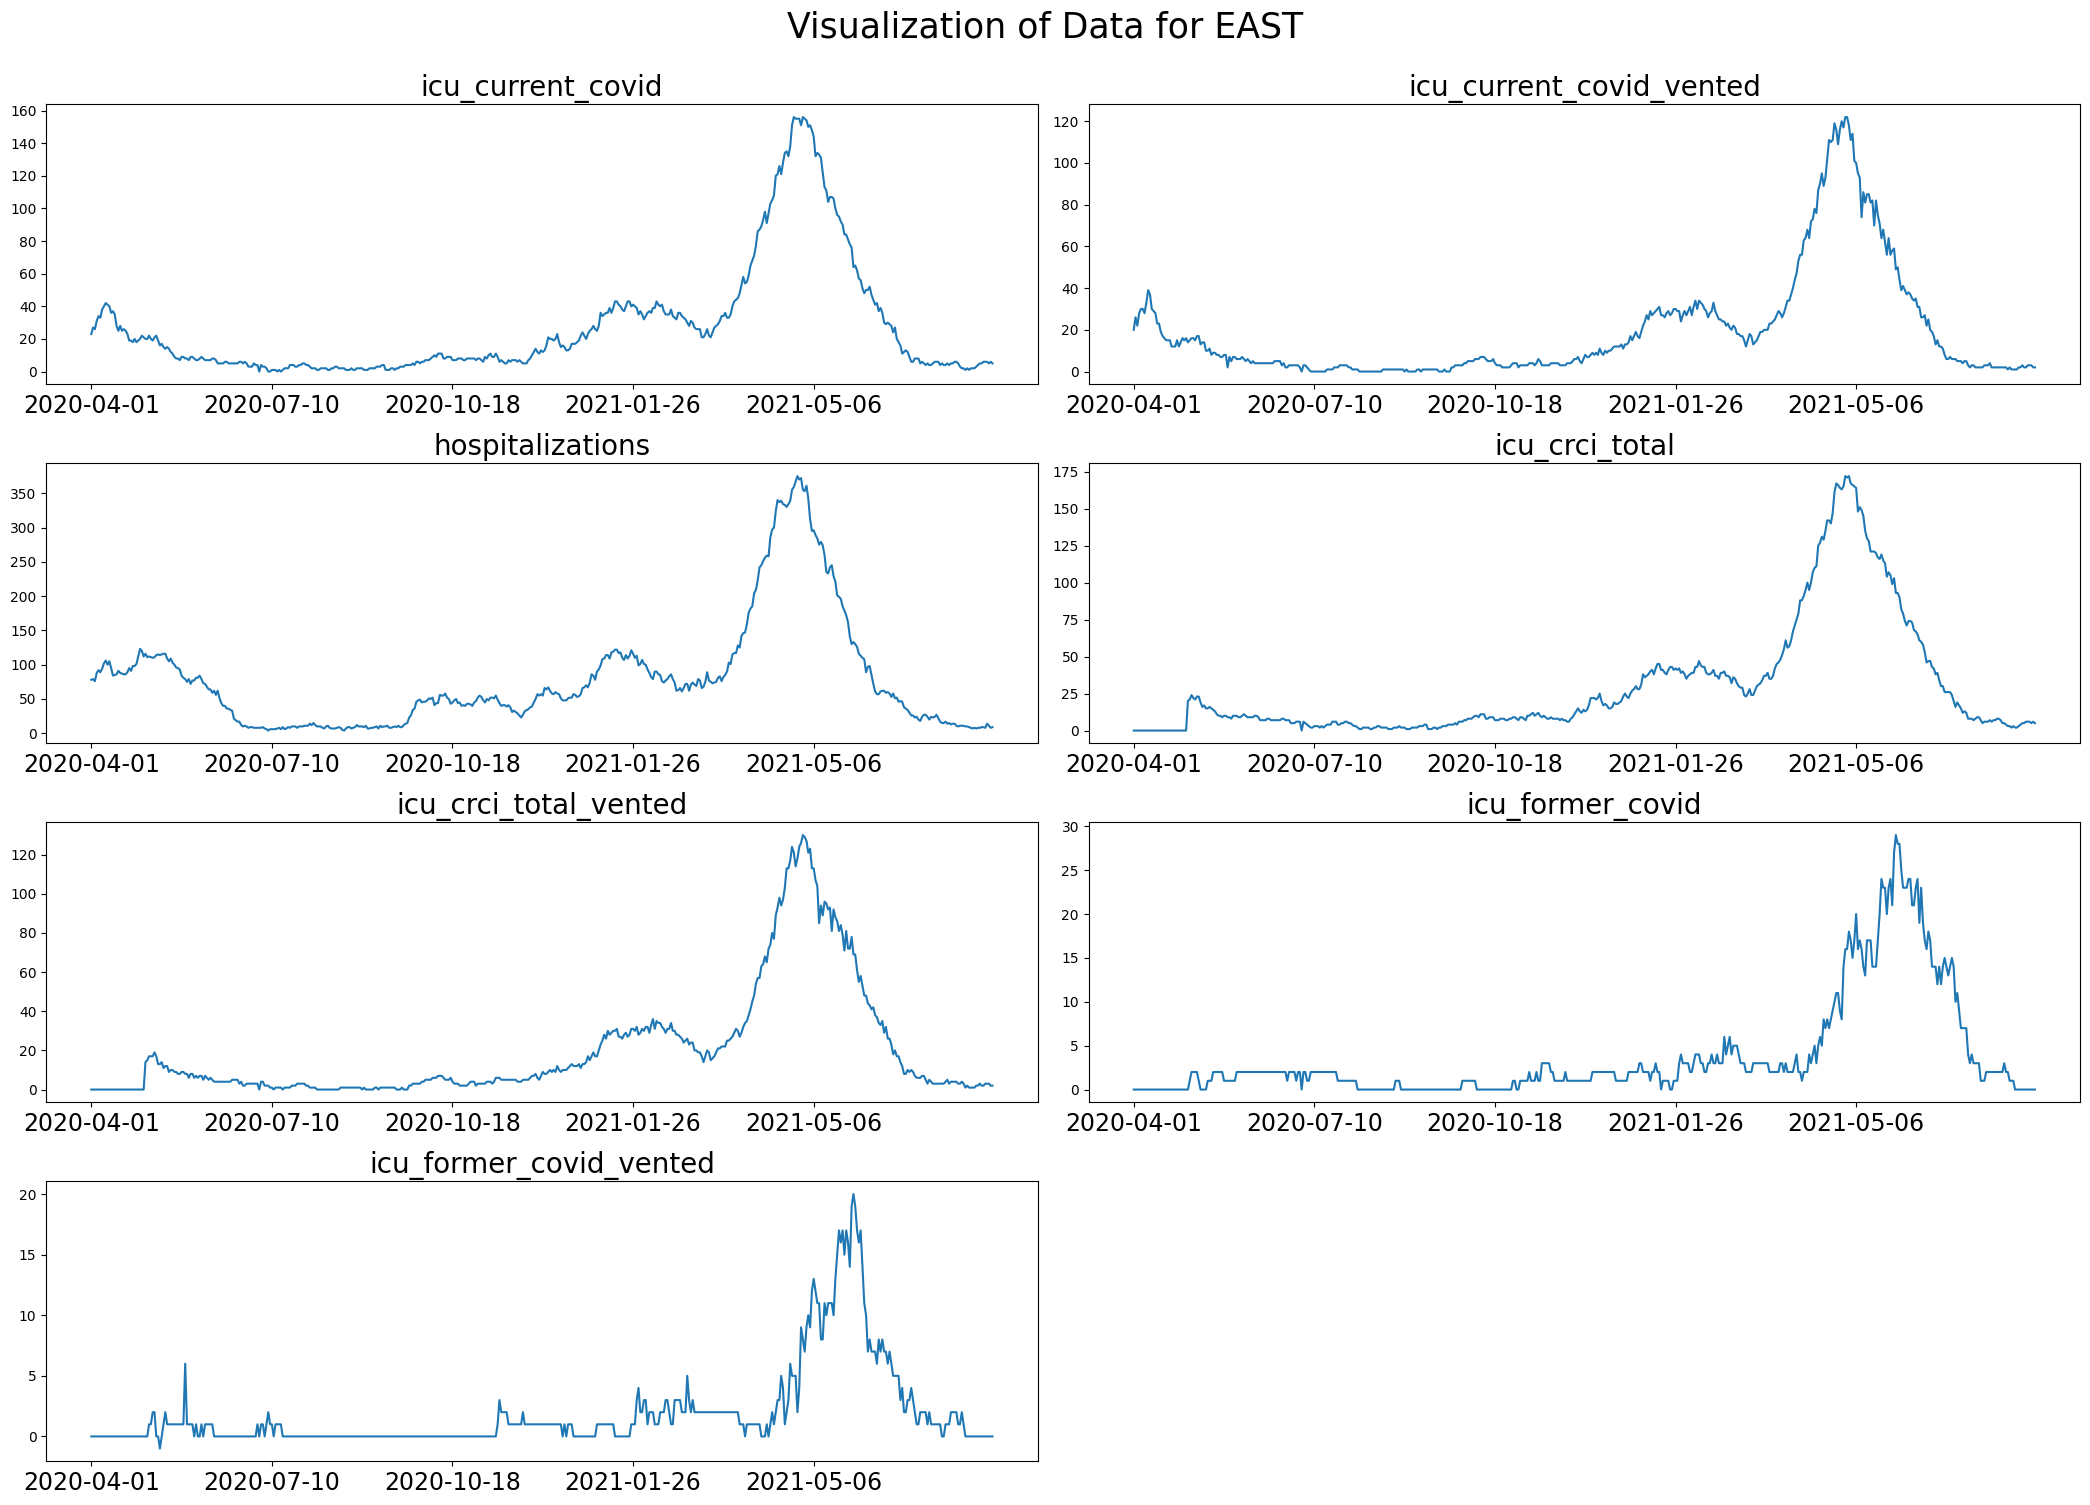

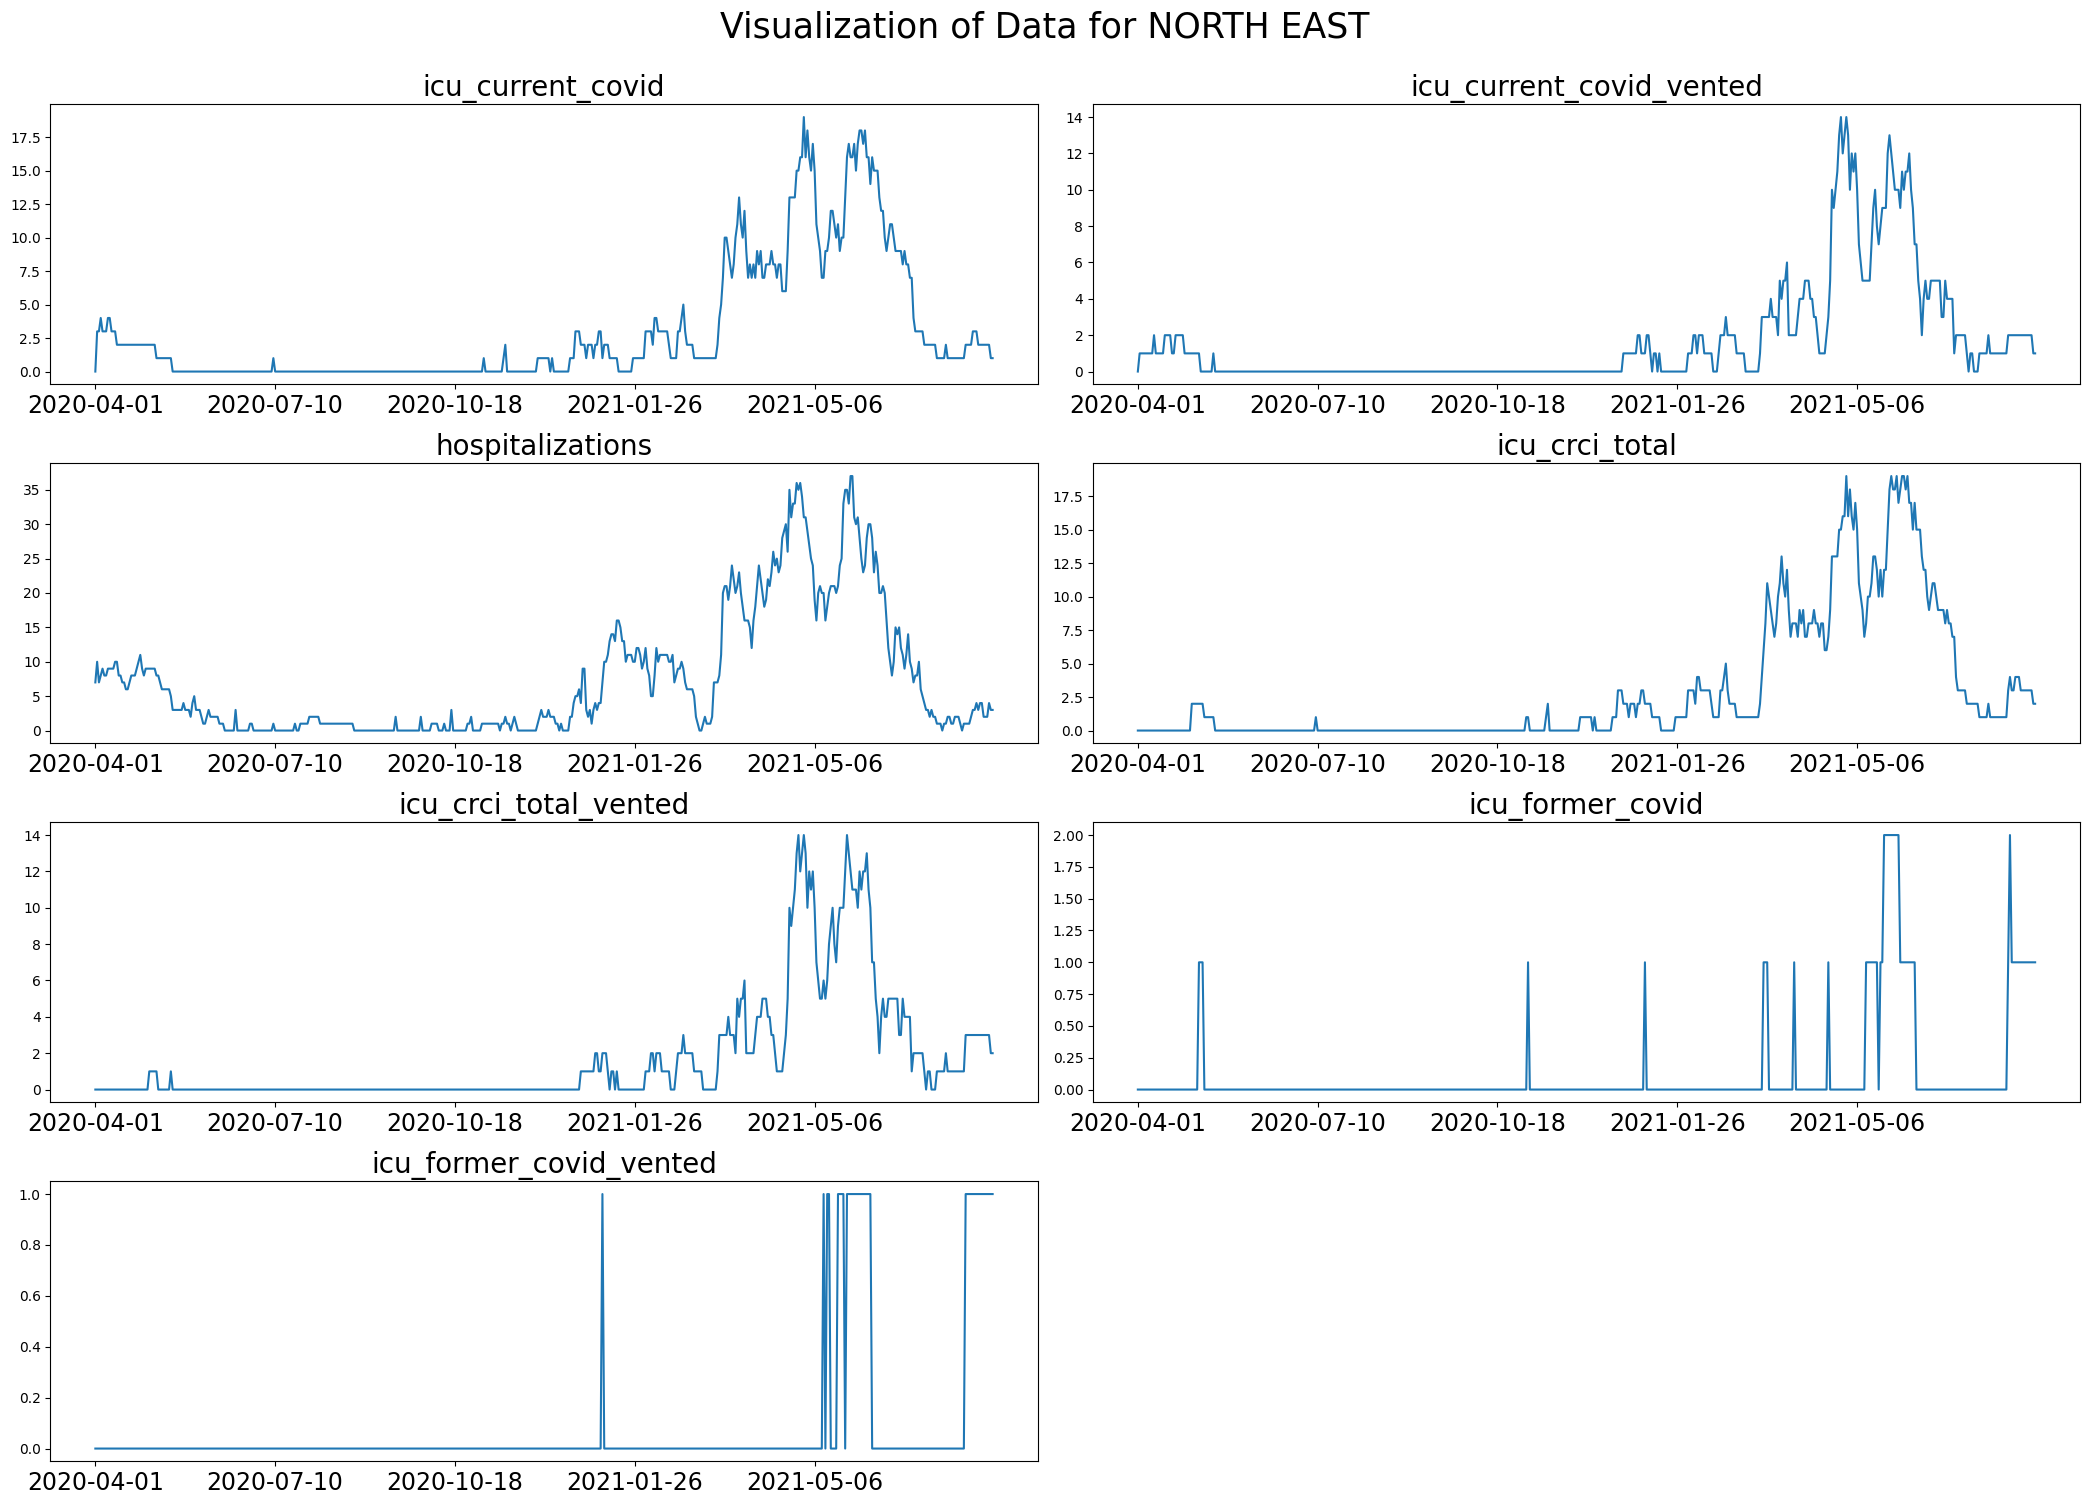

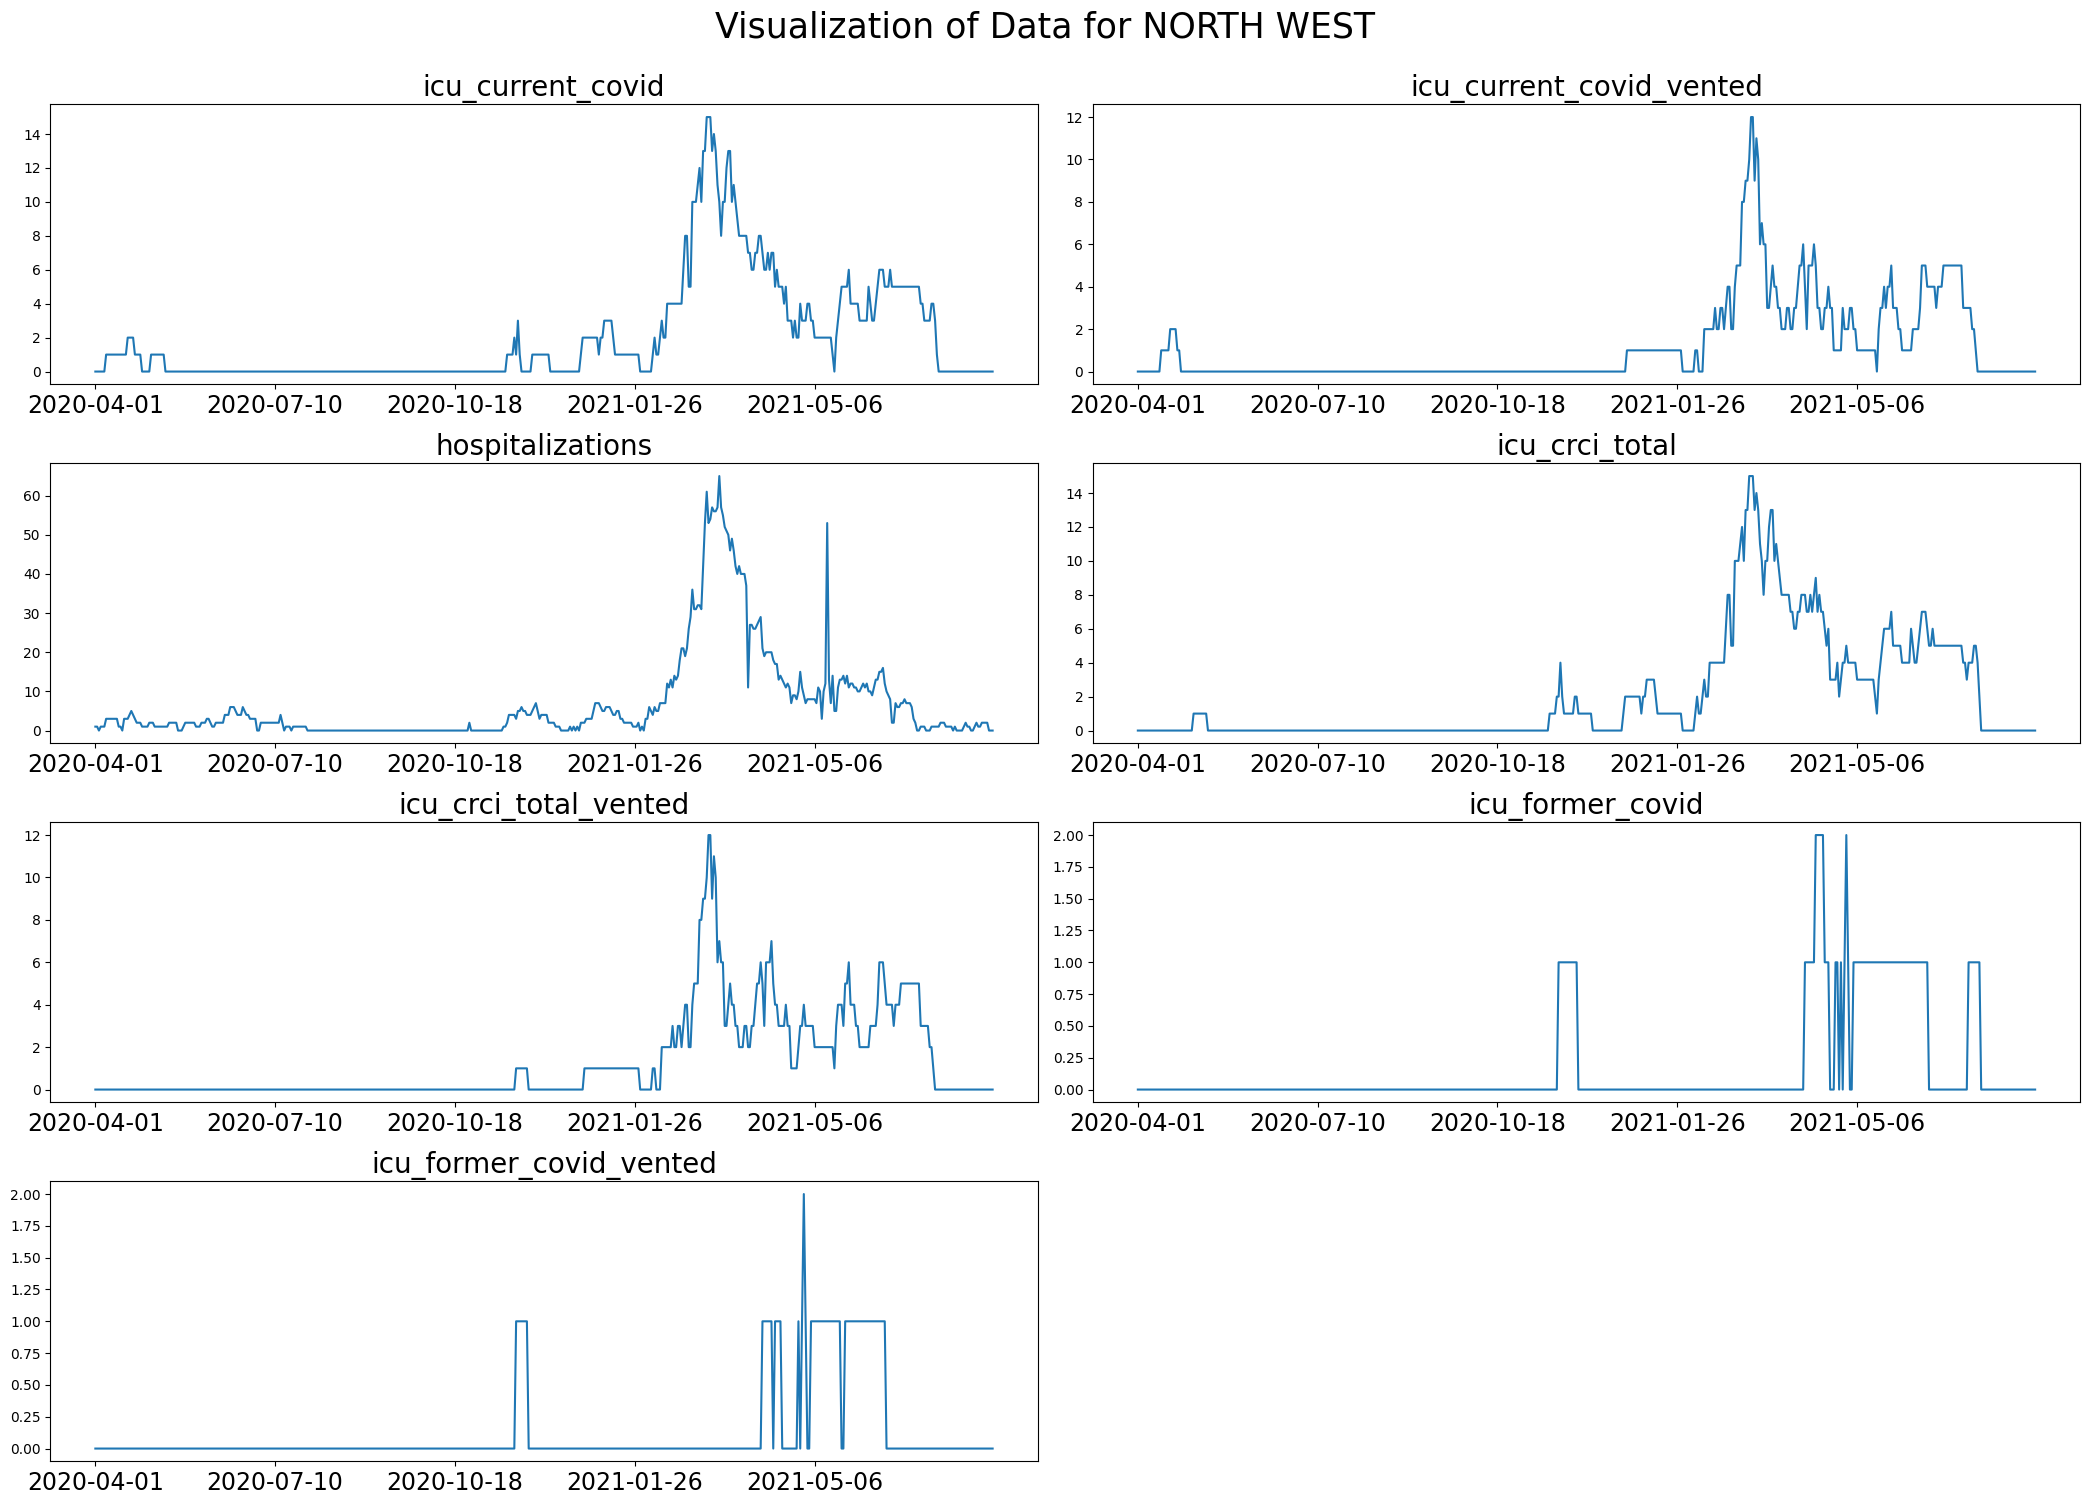

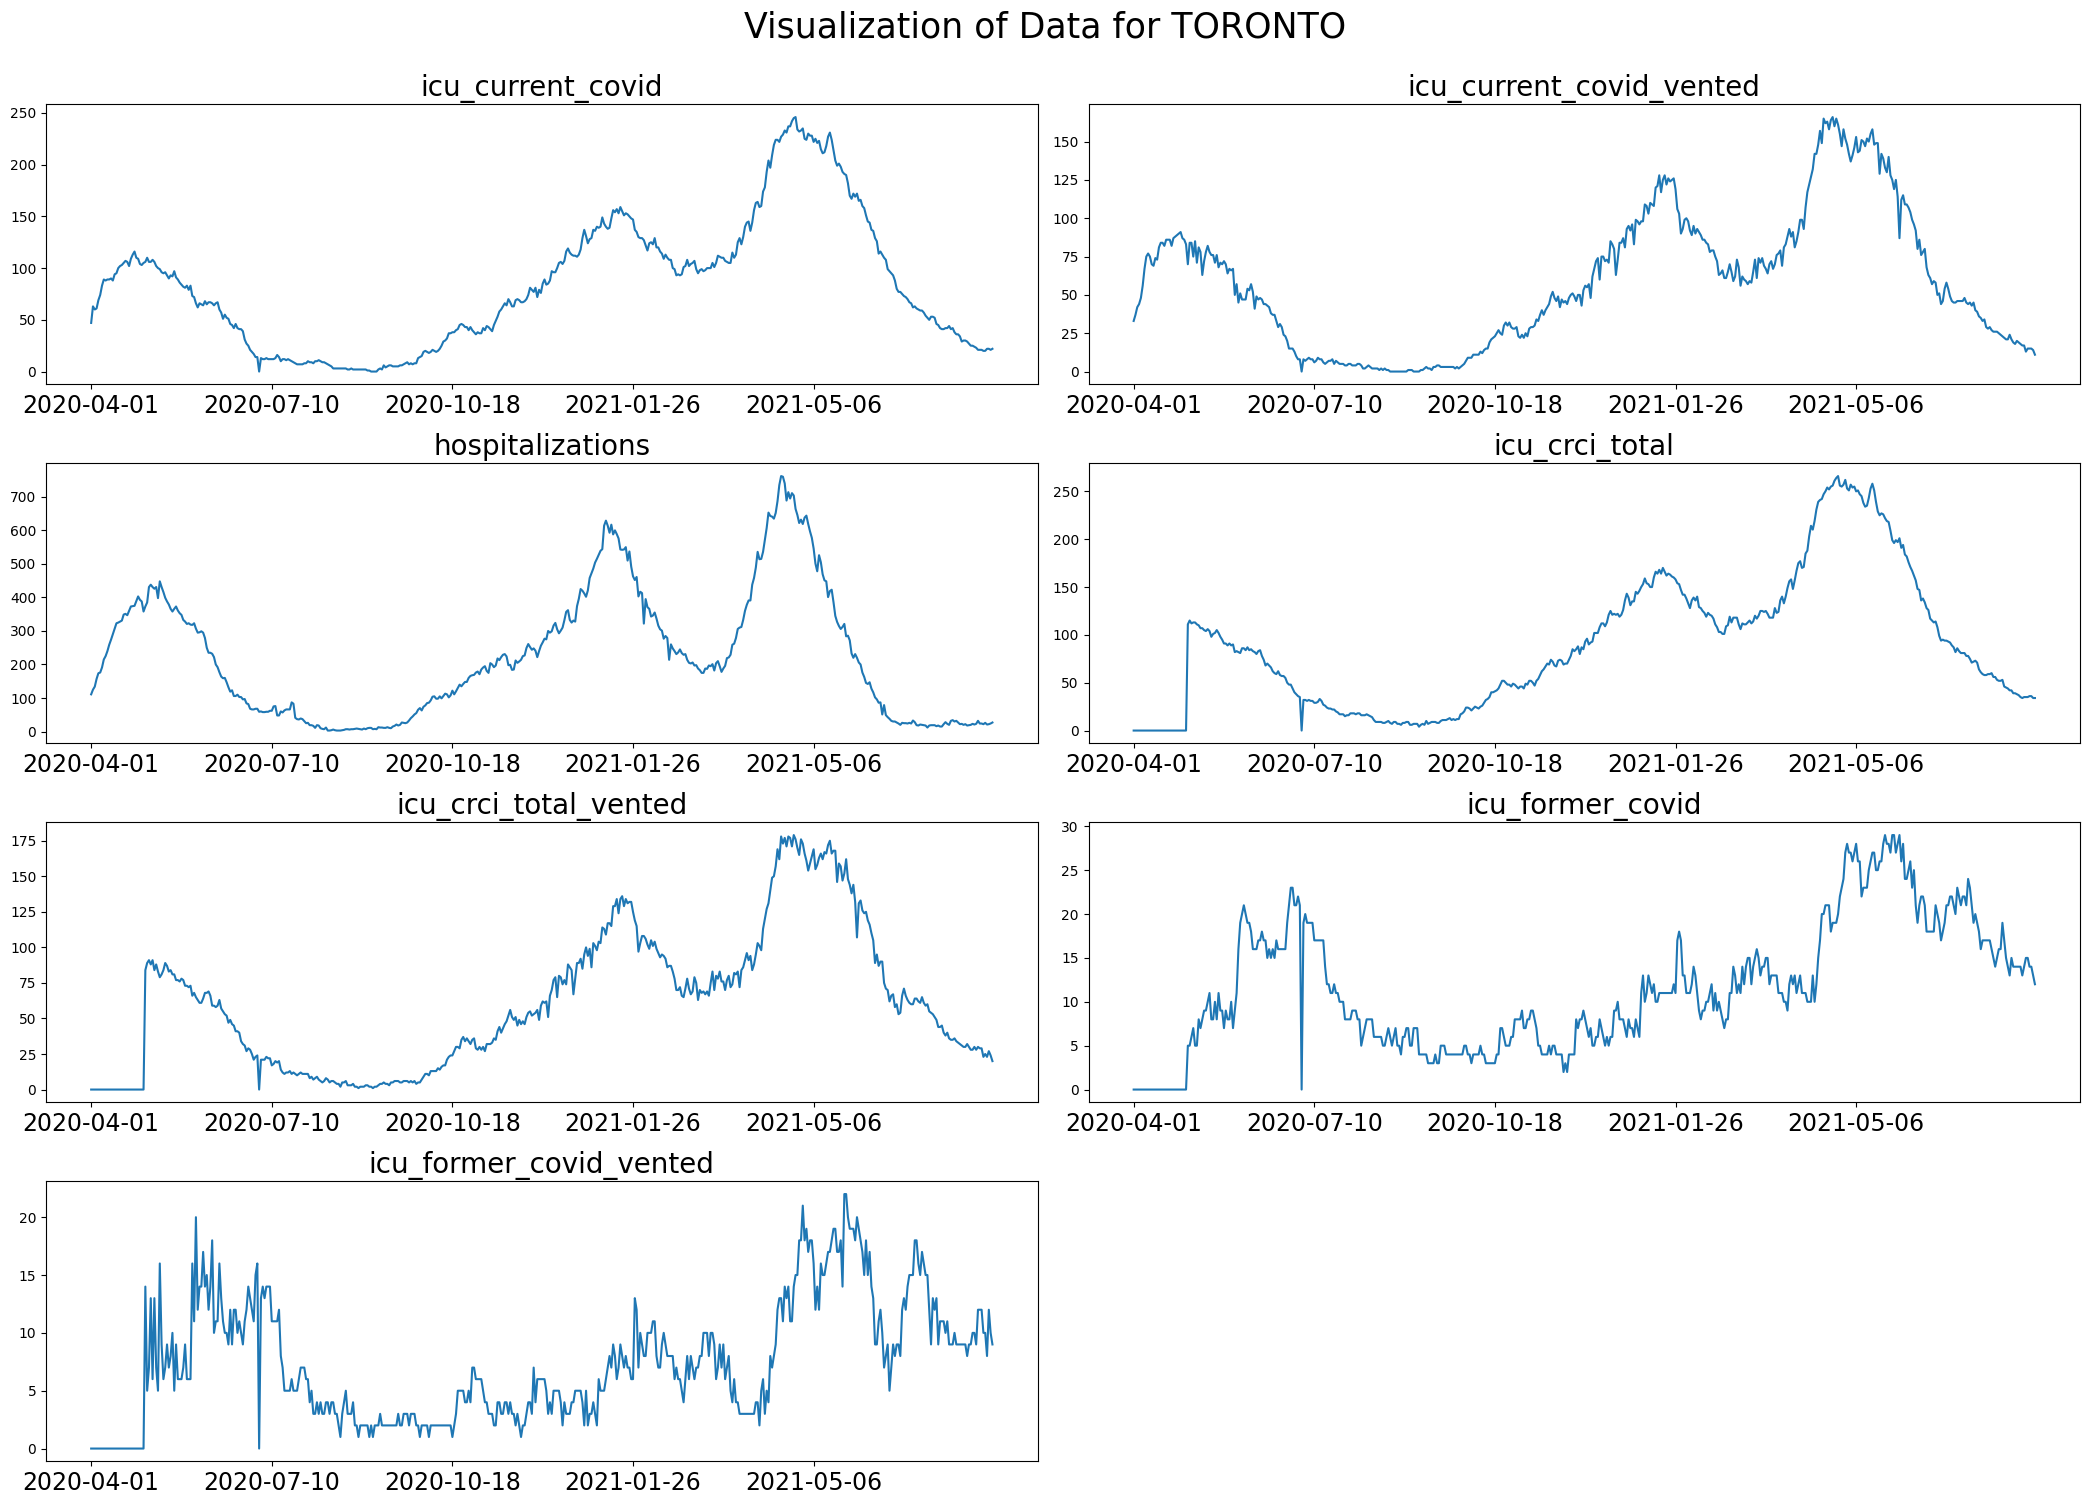

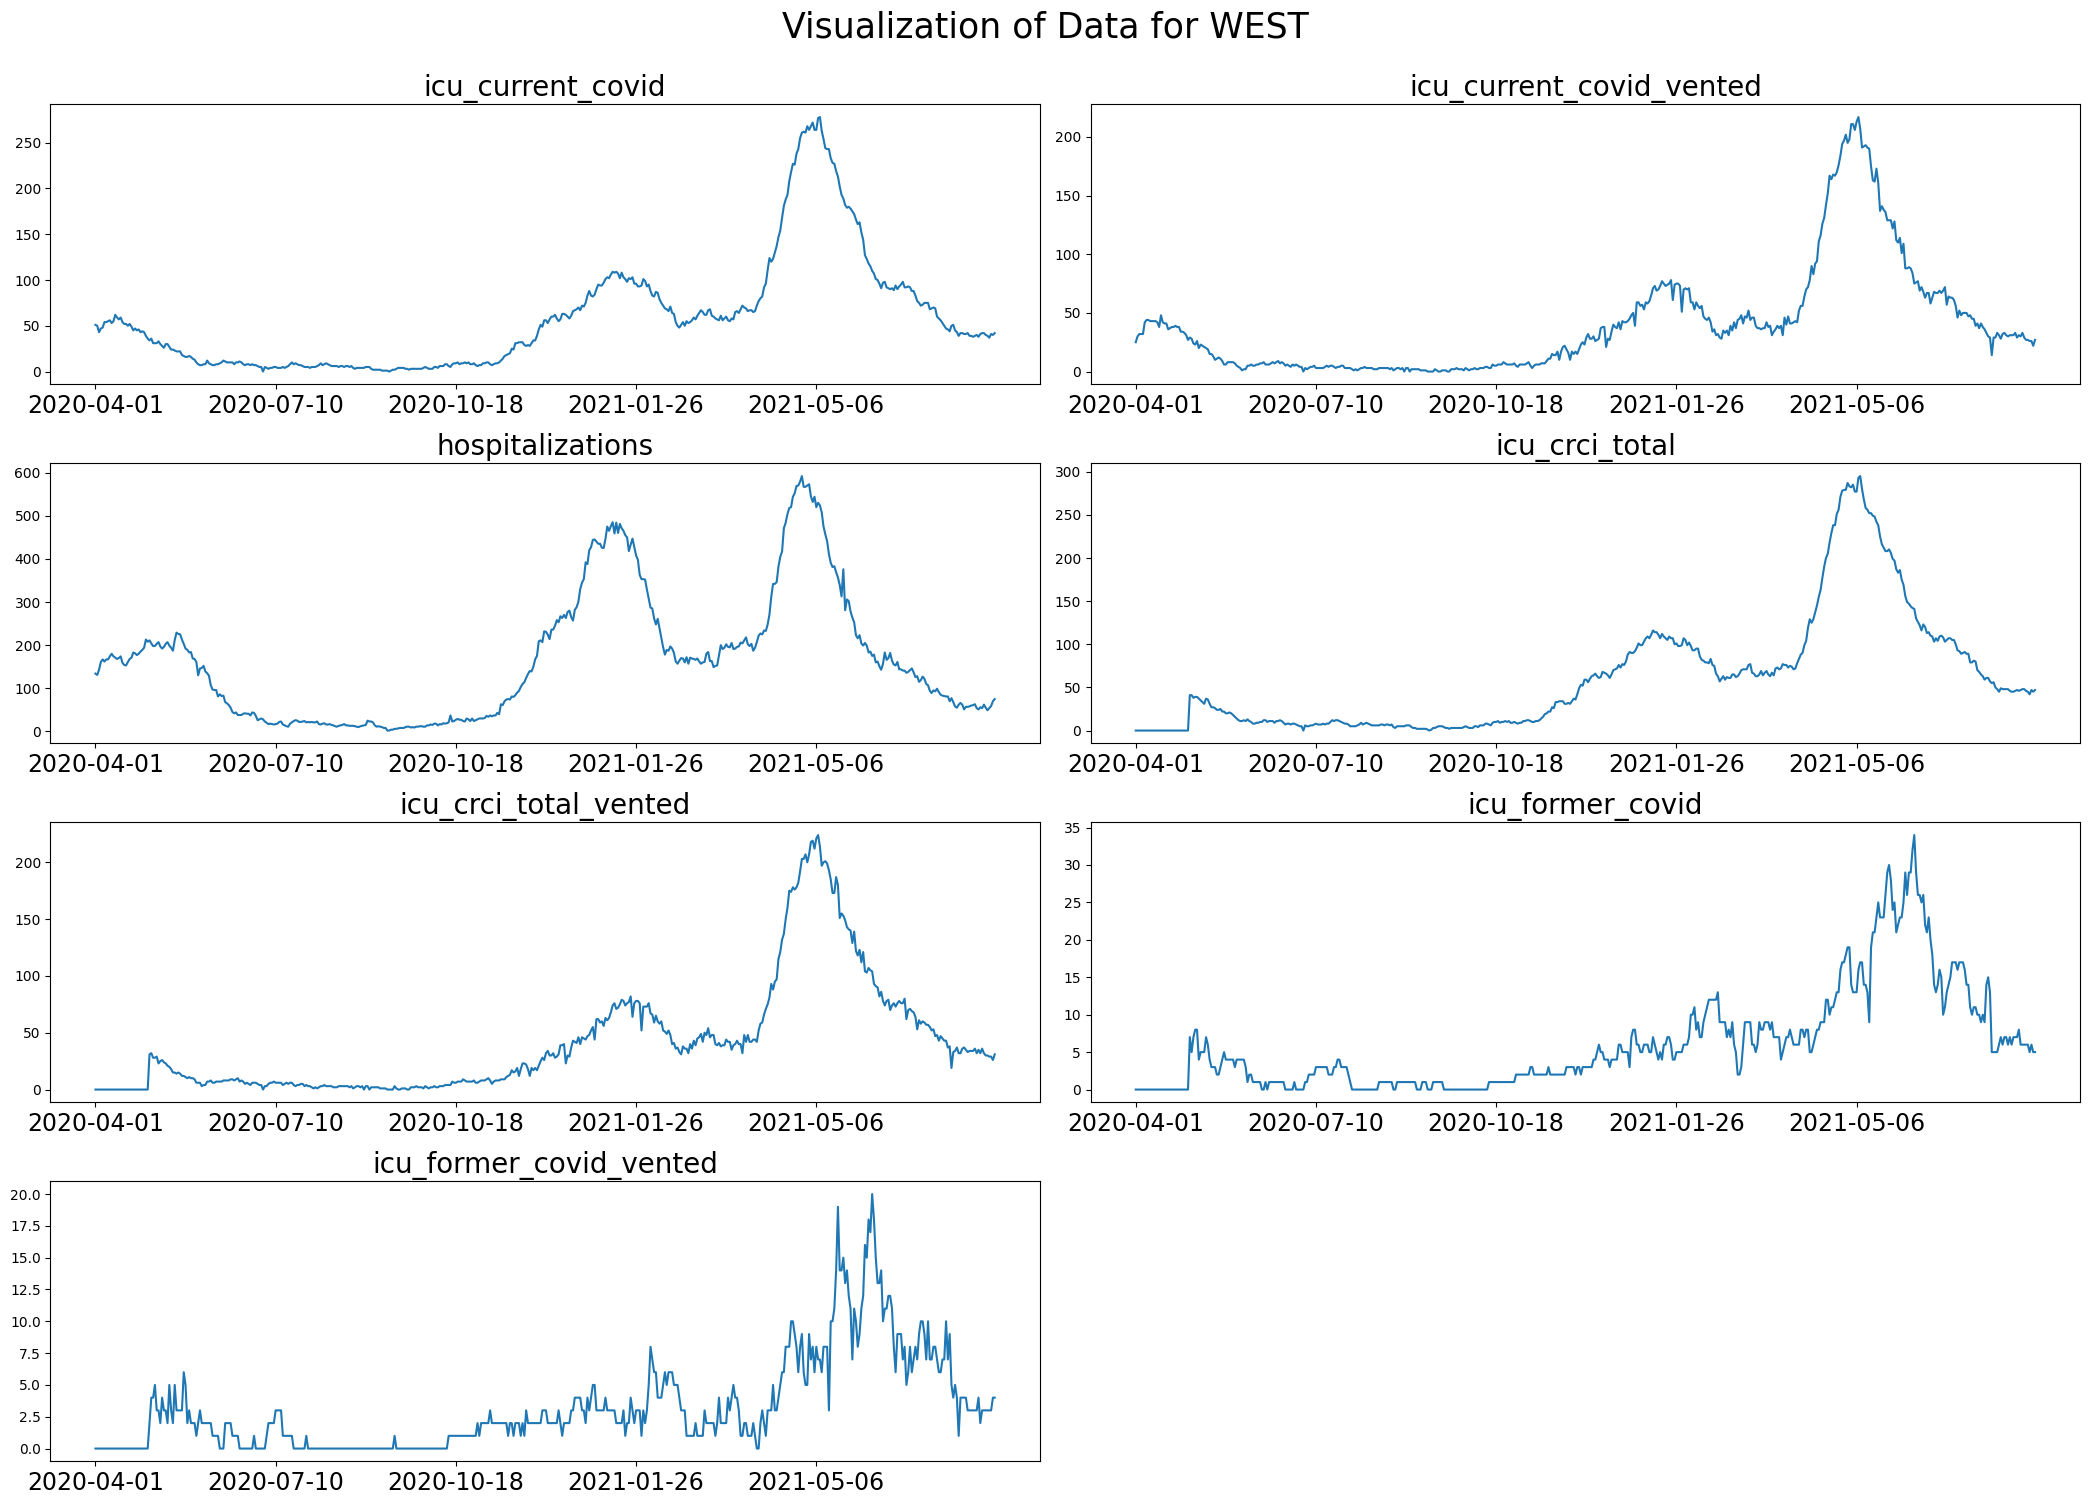

In [9]:
# We visualise the time series trajectory for the first 500 data points after grouping by region
for region in regions:
    location = data.loc[region]
    plt.figure(figsize=(21,15))
    i = 1
    plt.suptitle("Visualization of Data for " + region, fontsize = 25, y = 1.0)
    for name in data.columns[1:]:
        plt.subplot(4,2,i)
        plt.plot(np.arange(len(location['date'][:500])), location[name][:500])
        plt.xticks(np.arange(0,500,100), location["date"][0:500:100], fontsize = 17)
        plt.title(name, fontsize = 20)
        i +=1
    plt.tight_layout()
    plt.show()

We observe that regions such as NORTH EAST AND NORTH WEST records low numbers comparedd with the others. For instances, while covid ventilation ranged (0,2) for these two regions the others range from (0,20) with high level of hospitalisation and icu admission. 

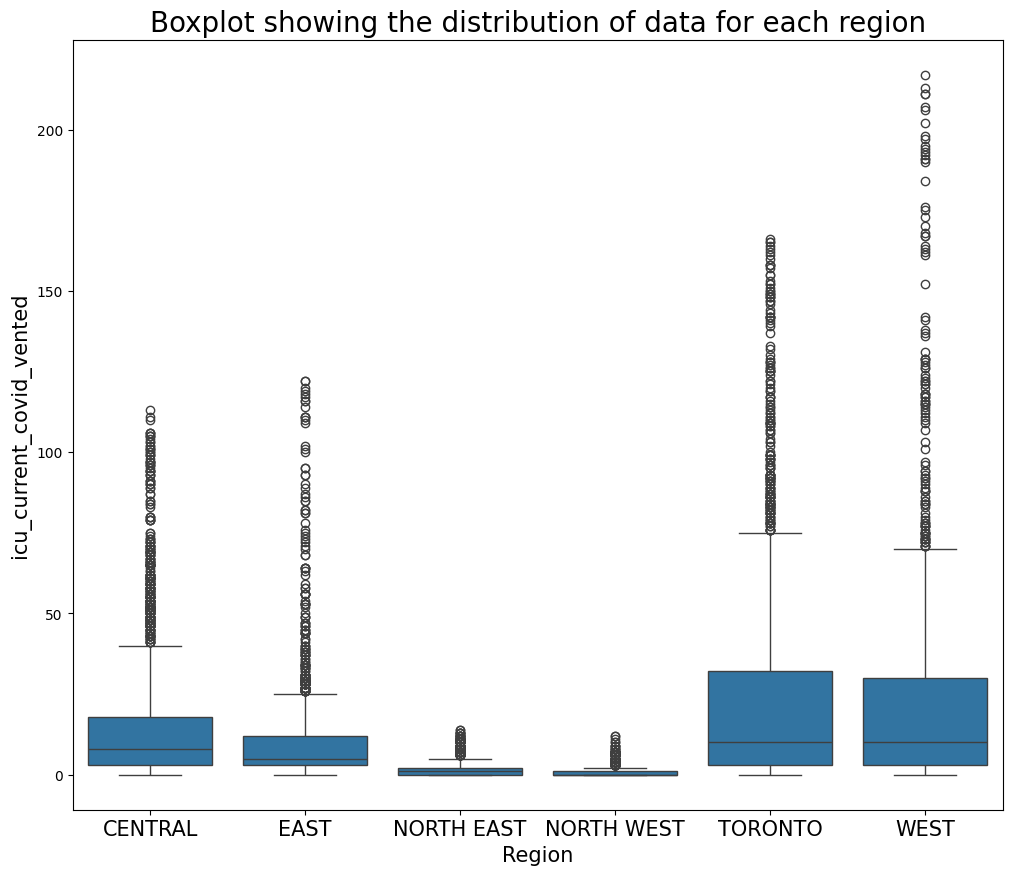

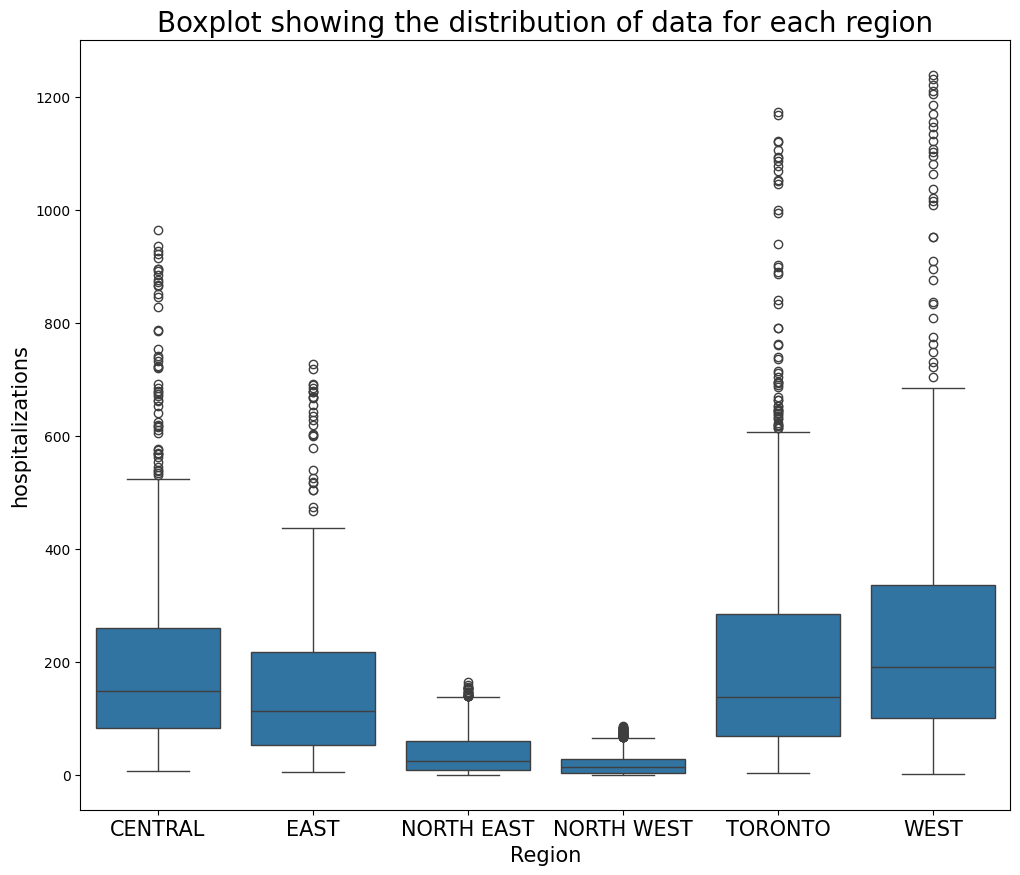

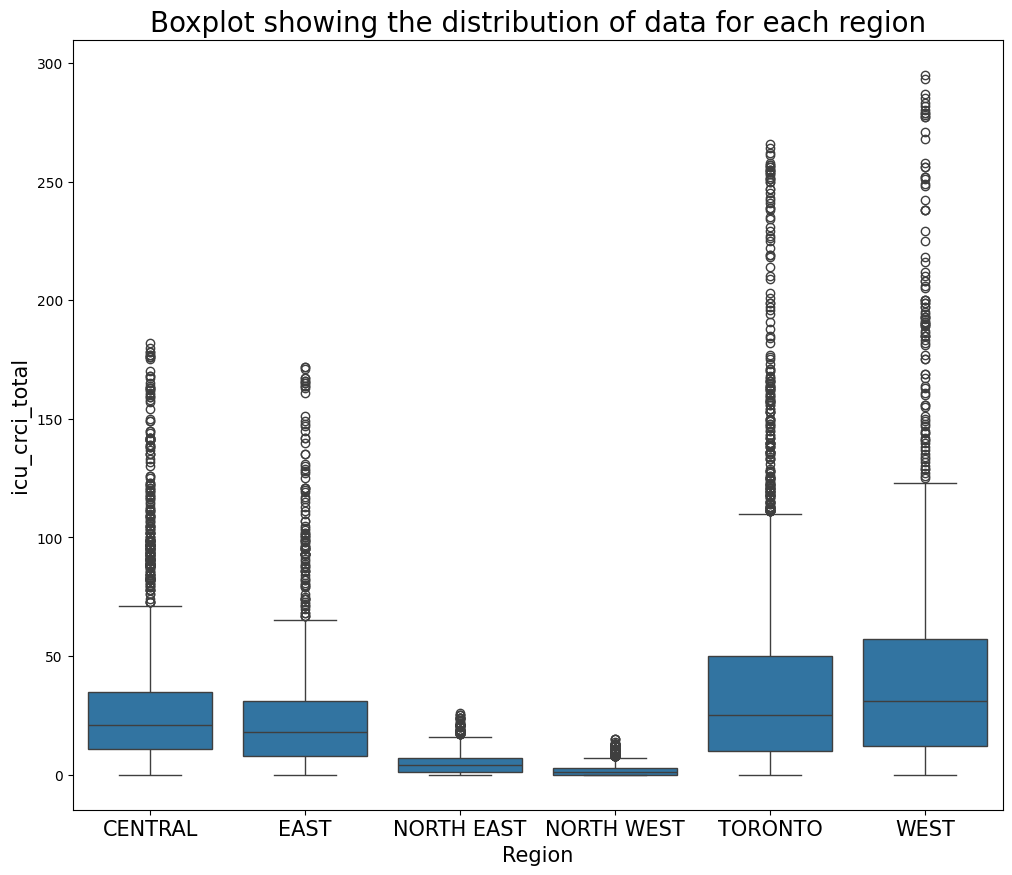

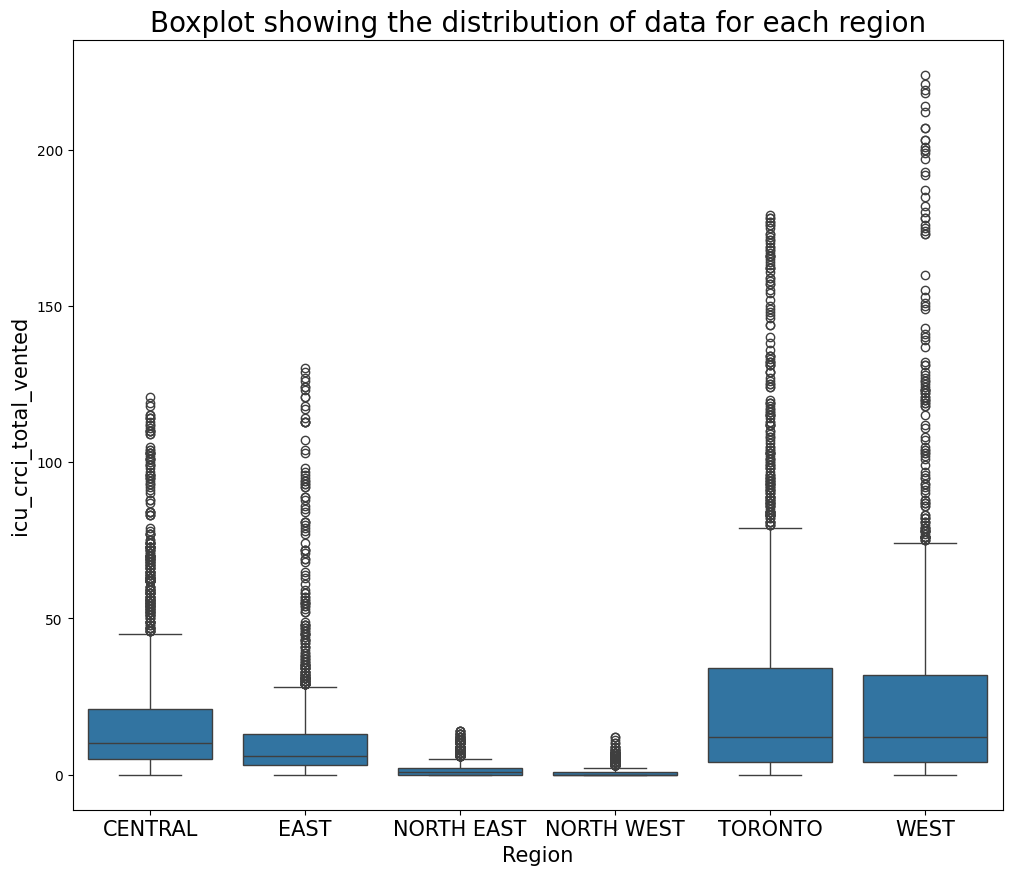

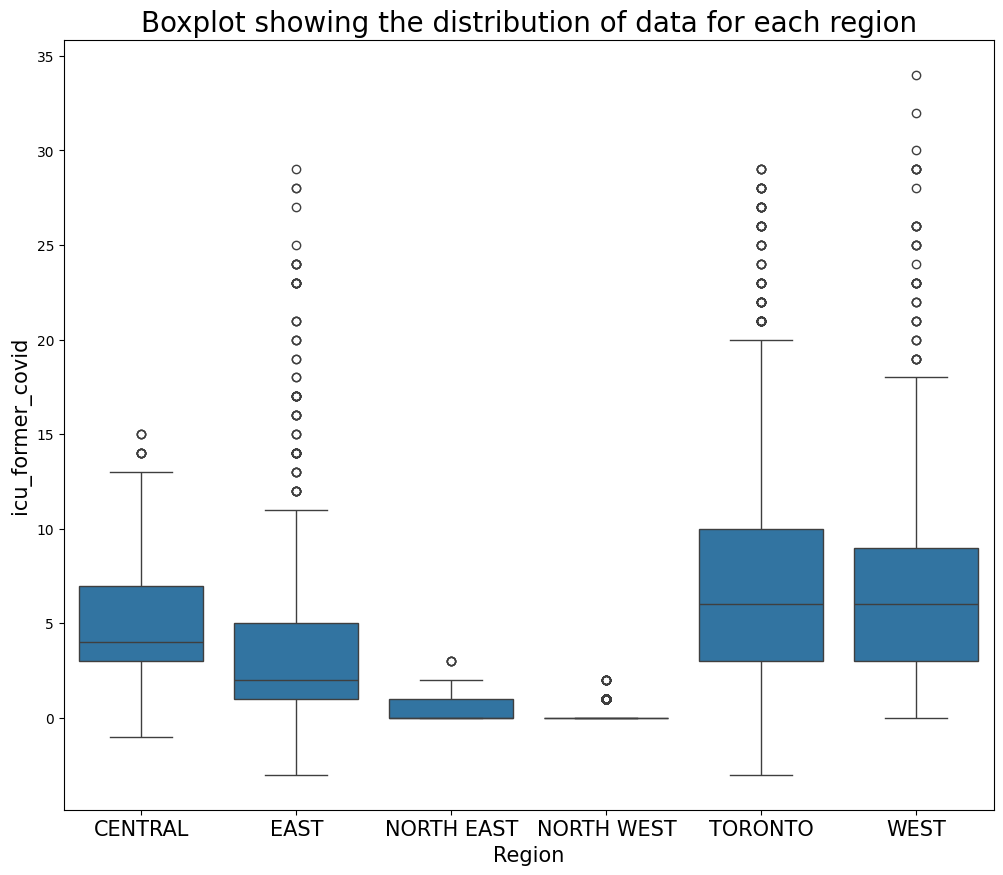

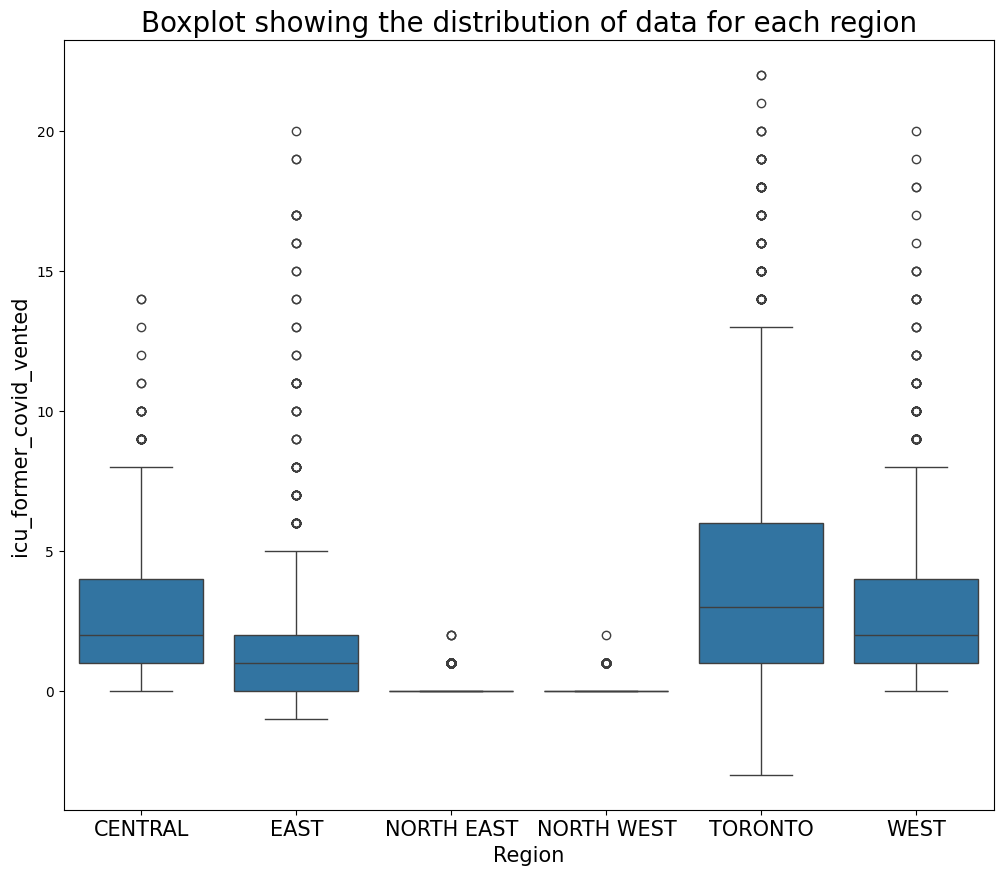

In [10]:
for name in data.columns[2:]:
    plt.figure(figsize = (12,10))
    sns.boxplot(data = data[data.columns[2:]], x ='oh_region', y = name)
    plt.xticks(fontsize = 15)
    plt.xlabel("Region",fontsize = 15)
    plt.ylabel(name, fontsize = 15)
    plt.title("Boxplot showing the distribution of data for each region", fontsize = 20)
 

The boxplot above is shown for all six regions with comparison with respect to their distribution. In all the plots, we observe that the distribution for NORTH EAST AND NORTH WEST do not have outliners compared with the other regions. This is consistent with the time series trajectory we saw earlier. It will be challenging to try to gives for these differences with further analysis. From observation, it appears the "WEST" region is the worst in all due the outliers and distribution structure. 

In summary, the time series trajectory and statistics analysis gives us a fair idea of hospitalisation, icu and ventilation us in Canada and across six regions which is able to help influence policy decisions and allocation of resources. 